# Fullplot zur Genrevorhersage mit einfachen Techniken des maschinellen Lernens

(Dies ist nur ein einfacher Versuch, für eine ausführlichere machine learning Anwendung siehe `sentiment_analysis`)

In [25]:
import pandas as pd # Pandas is a library for data manipulation and analysis

In diesem Codeschnipsel lesen wir zunächst die Filmdaten aus einer CSV-Datei in einen Pandas-Datenframe. Dann filtern wir Filme mit weniger als 1000 Stimmen auf IMDB heraus. Schließlich zeigen wir den Kopf des gefilterten Datenrahmens an, um die obersten 5 Zeilen des resultierenden Datensatzes zu sehen.

In [26]:
#Reading the movie data from a CSV file into a pandas dataframe
df = pd.read_csv('movies_initial.csv')

#Filtering out movies with less than 1000 votes on IMDB
df = df[df["imdbVotes"] >= 1000]

#Displaying the head of the filtered dataframe
df.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie
5,12,The Arrival of a Train,1896,NaN,1 min,"Documentary, Short",1896-01-01,"Auguste Lumi�re, Louis Lumi�re",NaN,NaN,...,7.3,5043.0,https://m.media-amazon.com/images/M/MV5BMjEyND...,A group of people are standing in a straight l...,A group of people are standing in a straight l...,NaN,France,NaN,2015-08-15 00:02:53.443000000,movie
6,14,Tables Turned on the Gardener,1895,NaN,1 min,"Comedy, Short",NaN,Louis Lumi�re,NaN,"Fran�ois Clerc, Beno�t Duval",...,7.1,2554.0,NaN,"A gardener is watering his flowers, when a mis...","A gardener is watering his flowers, when a mis...",NaN,France,NaN,2015-08-12 00:06:18.237000000,movie


Die Spalten genre und fullplot werden aus dem df extrahiert, da keine anderen benötigt werden.


In [27]:
df = df[['genre', 'fullplot']]
df

,genre,fullplot
0,"Documentary, Short",Performing on what looks like a small wooden s...
1,Short,A stationary camera looks at a large anvil wit...
4,"Documentary, Short",A man opens the big gates to the Lumi�re facto...
5,"Documentary, Short",A group of people are standing in a straight l...
6,"Comedy, Short","A gardener is watering his flowers, when a mis..."
...,...,...
45612,Drama,Four lives intersect along the Ganges: a low c...
45664,"Comedy, Drama, Romance","Premam is all about romance and fun, though th..."
45730,"Action, Drama","The simple yet, inspiring tale of Srimanthudu ..."
45888,"Comedy, Drama, Romance",Various Londeners meet people in Hampstead Hea...


Zeilen mit fehlenden Werten in der Spalte "fullplot" entfernen

In [28]:
# Remove rows with missing values in the "fullplot" column
df = df.dropna(subset=['fullplot'])

In [29]:
# Convert the fullplot column to a string
df['fullplot'] = df['fullplot'].astype(str)
# Apply the lower method to the "fullplot" column
df['fullplot'] = df['fullplot'].str.lower()

C:\Users\swt4fe\AppData\Local\Temp\ipykernel_13084\3205929502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fullplot'] = df['fullplot'].astype(str)
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_13084\3205929502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fullplot'] = df['fullplot'].str.lower()


Hier werden nur die Top 10 Genres basierend auf deren Vorkommenshäufigkeit im Datensatz gelassen.

In [30]:
# Count the occurrence
genre_counts = df['genre'].value_counts()
# Get the top 10 genres
top_10_genres = genre_counts.head(10).index
# Filter the DataFrame to only include this genres
df = df[df['genre'].isin(top_10_genres)]
df

,genre,fullplot
103,Comedy,charlie talks wealthy farmer's daughter tillie...
111,Drama,edith hardy uses charity funds for wall street...
187,Drama,"stella maris is a beautiful, crippled girl, wh..."
194,"Drama, Romance",cheng huan is a missionary whose goal is to br...
196,"Comedy, Drama",wealthy jervis pendleton acts as benefactor fo...
...,...,...
45398,"Comedy, Drama, Romance",the husband factor is the story of efsun (30) ...
45462,Comedy,"several roasters, and the master himself kevin..."
45612,Drama,four lives intersect along the ganges: a low c...
45664,"Comedy, Drama, Romance","premam is all about romance and fun, though th..."


Sodass dieser wie folgt aufgeteilt ist:

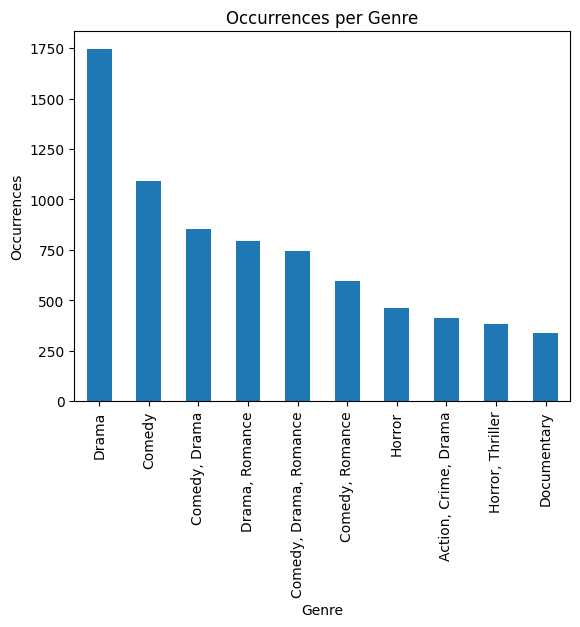

In [31]:
import matplotlib.pyplot as plt
# Create a bar chart displaying the occurrences of each genre
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Occurrences')
plt.title('Occurrences per Genre')

# Display the plot
plt.show()

Train/Test (0.8,0.2) Split:

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['fullplot'], df['genre'], test_size=0.2, random_state=0)

wir verwenden de TfidfVectorizer aus sklearn, um Textdaten in numerische Merkmale umzuwandeln

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training and test data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train

Es wird eine Liste von Klassifizierern definiert, die trainiert werden sollen, und jeder Klassifizierer wird anhand der Trainings- und Testdaten bewertet. Wir berechnen die Genauigkeit jedes Klassifizierers für die Testdaten und geben die Ergebnisse aus. So können wir die Leistung der verschiedenen Klassifikatoren vergleichen und den besten für unsere Aufgabe auswählen.

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers to try
classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=100000)),
    ('Linear SVM', LinearSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]
# Train and evaluate each classifier
for name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f'{name}: {accuracy:.3f}')

Naive Bayes: 0.222
Logistic Regression: 0.410
Linear SVM: 0.421
Decision Tree: 0.262
Random Forest: 0.341


Wir führen wir ein Hyperparameter-Tuning für zwei Klassifikatoren durch: LinearSVC und RandomForestClassifier.. Wir definieren Raster für jeden Klassifikator. Aus Zeitgründen wird für Random Forest eine RandomizedSearch verwendet, welche nicht alle Parameterkombinationen ausprobiert

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid_svc = {
    'C': [0.1, 0.7,1, 1.5, 5, 10, 15, 20 ]
}

svc = LinearSVC()


grid_svc = GridSearchCV(svc, param_grid_svc)


grid_svc.fit(X_train, y_train)

print(f'Best hyperparameters for LinearSVC: {grid_svc.best_params_}')

param_grid_rf = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50]
}


rf = RandomForestClassifier()

grid_rf = RandomizedSearchCV(rf, param_grid_rf)

grid_rf.fit(X_train, y_train)

print(f'Best hyperparameters for RandomForestClassifier: {grid_rf.best_params_}')

Best hyperparameters for LinearSVC: {'C': 0.7}
Best hyperparameters for RandomForestClassifier: {'n_estimators': 100, 'max_depth': None}


Nun verwenden wir die besten Kombinationen der Hyperparameter zum erneuten trainieren und evaluieren der Modelle.

In [41]:
# Define a list of classifiers to try
classifiers = [
    ('Linear SVM', LinearSVC(C=0.7)),
    ('Random Forest', RandomForestClassifier(n_estimators= 100, max_depth= None))
]
# Train and evaluate each classifier
for name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f'{name}: {accuracy:.3f}')

Linear SVM: 0.427
Random Forest: 0.341


Auch eine Grid-Search konnte die Accuracy nicht merkbar verbessern. Es gibt mehrere mögliche Gründe, warum einfache maschinelle Lernmodelle mit einem TF-IDF-Vektorisierer für ein 10-Klassen-Klassifizierungsproblem nicht gut funktionieren. Dazu gehören die große Anzahl von Klassen, die Ähnlichkeit der Klassen, die Einschränkungen der TF-IDF-Darstellung sowie die Menge und Qualität der Trainingsdaten. Eine detailliertere Untersuchung könnte mehr Aufschluss über die spezifischen Gründe geben und Möglichkeiten zur Verbesserung der Leistung vorschlagen.
Weitere denkbare Schritte wären:

- Sammeln von mehr Trainingsdaten
- Experimentieren mit anderen Feature-Representationen
- Erweitern der Hyperparametergrids
- Andere, größere Modelle verwenden (RNN,LSTM,Transformer)